In [1]:
# import required libraries

# data preprocessing
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import IsolationForest

# visualization
from matplotlib import pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (15.0, 6.0)

# implementing deep learning model
import tensorflow as ts
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import Adam

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import load_model 

In [2]:
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(0,len(sequences),n_steps_in):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [3]:
data = np.array([[1,2,3],
        [2,4,0],
        [4,6,-3],
        [8,8,0],
        [16,10,3],
        [32,12,0],
        [64,14,-3],
        [128,16,0],
        [256,18,3],
        [512,20,0],
        [1024,22,-3],
        [2048,24,0],
        [4096,26,3]])

In [4]:
n_steps_in = 4
n_steps_out = 2
n_features = 3
X_data, y_data = split_sequences(data,n_steps_in,n_steps_out)

In [5]:
print("-------- X --------")
display(X_data)
print("-------- y --------")
display(y_data)
y_data = y_data.reshape(y_data.shape[0],n_steps_out*n_features)
display(y_data)


-------- X --------


array([[[  1,   2,   3],
        [  2,   4,   0],
        [  4,   6,  -3],
        [  8,   8,   0]],

       [[ 16,  10,   3],
        [ 32,  12,   0],
        [ 64,  14,  -3],
        [128,  16,   0]]])

-------- y --------


array([[[ 16,  10,   3],
        [ 32,  12,   0]],

       [[256,  18,   3],
        [512,  20,   0]]])

array([[ 16,  10,   3,  32,  12,   0],
       [256,  18,   3, 512,  20,   0]])

In [6]:
model = Sequential()
model.add(LSTM(16,return_sequences=True,input_shape=(n_steps_in,n_features)))
model.add(Dropout(0.2))
model.add(LSTM(16,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(n_steps_out*n_features))

In [7]:
# 
model.compile(optimizer=Adam(learning_rate=0.0008), loss="mse")
epochs = 3000
# validation_split = 0.25 # 30% validation set
history = model.fit(x=X_data, y=y_data, epochs=epochs,  verbose=1,shuffle=False)

Epoch 1/3000
1/1 [==============================] - 15s 15s/step - loss: 27500.1172
Epoch 2/3000
1/1 [==============================] - 0s 19ms/step - loss: 27504.1289
Epoch 3/3000
1/1 [==============================] - 0s 17ms/step - loss: 27500.0859
Epoch 4/3000
1/1 [==============================] - 0s 19ms/step - loss: 27493.0020
Epoch 5/3000
1/1 [==============================] - 0s 19ms/step - loss: 27498.9121
Epoch 6/3000
1/1 [==============================] - 0s 19ms/step - loss: 27496.3379
Epoch 7/3000
1/1 [==============================] - 0s 18ms/step - loss: 27515.6348
Epoch 8/3000
1/1 [==============================] - 0s 16ms/step - loss: 27508.0234
Epoch 9/3000
1/1 [==============================] - 0s 16ms/step - loss: 27485.9395
Epoch 10/3000
1/1 [==============================] - 0s 17ms/step - loss: 27491.5781
Epoch 11/3000
1/1 [==============================] - 0s 18ms/step - loss: 27490.9980
Epoch 12/3000
1/1 [==============================] - 0s 17ms/step - loss: 

1/1 [==============================] - 0s 17ms/step - loss: 27129.7383
Epoch 98/3000
1/1 [==============================] - 0s 18ms/step - loss: 27231.2832
Epoch 99/3000
1/1 [==============================] - 0s 18ms/step - loss: 27149.6562
Epoch 100/3000
1/1 [==============================] - 0s 21ms/step - loss: 27059.0078
Epoch 101/3000
1/1 [==============================] - 0s 19ms/step - loss: 27025.7207
Epoch 102/3000
1/1 [==============================] - 0s 21ms/step - loss: 27086.5020
Epoch 103/3000
1/1 [==============================] - 0s 22ms/step - loss: 27044.1074
Epoch 104/3000
1/1 [==============================] - 0s 19ms/step - loss: 27170.5391
Epoch 105/3000
1/1 [==============================] - 0s 19ms/step - loss: 27123.8535
Epoch 106/3000
1/1 [==============================] - 0s 21ms/step - loss: 27058.1211
Epoch 107/3000
1/1 [==============================] - 0s 19ms/step - loss: 27101.2715
Epoch 108/3000
1/1 [==============================] - 0s 20ms/step - lo

1/1 [==============================] - 0s 17ms/step - loss: 26683.1055
Epoch 193/3000
1/1 [==============================] - 0s 18ms/step - loss: 26822.8555
Epoch 194/3000
1/1 [==============================] - 0s 16ms/step - loss: 26771.4805
Epoch 195/3000
1/1 [==============================] - 0s 16ms/step - loss: 26842.1602
Epoch 196/3000
1/1 [==============================] - 0s 18ms/step - loss: 26738.1289
Epoch 197/3000
1/1 [==============================] - 0s 18ms/step - loss: 26706.1582
Epoch 198/3000
1/1 [==============================] - 0s 16ms/step - loss: 26811.7109
Epoch 199/3000
1/1 [==============================] - 0s 18ms/step - loss: 26659.8359
Epoch 200/3000
1/1 [==============================] - 0s 19ms/step - loss: 26852.8379
Epoch 201/3000
1/1 [==============================] - 0s 18ms/step - loss: 26717.5801
Epoch 202/3000
1/1 [==============================] - 0s 18ms/step - loss: 26799.8027
Epoch 203/3000
1/1 [==============================] - 0s 18ms/step - 

1/1 [==============================] - 0s 20ms/step - loss: 26470.9707
Epoch 288/3000
1/1 [==============================] - 0s 18ms/step - loss: 26643.0703
Epoch 289/3000
1/1 [==============================] - 0s 17ms/step - loss: 26507.4414
Epoch 290/3000
1/1 [==============================] - 0s 17ms/step - loss: 26466.0781
Epoch 291/3000
1/1 [==============================] - 0s 18ms/step - loss: 26673.4863
Epoch 292/3000
1/1 [==============================] - 0s 17ms/step - loss: 26429.8789
Epoch 293/3000
1/1 [==============================] - 0s 18ms/step - loss: 26516.0312
Epoch 294/3000
1/1 [==============================] - 0s 19ms/step - loss: 26363.5586
Epoch 295/3000
1/1 [==============================] - 0s 19ms/step - loss: 26598.6973
Epoch 296/3000
1/1 [==============================] - 0s 17ms/step - loss: 26581.4160
Epoch 297/3000
1/1 [==============================] - 0s 18ms/step - loss: 26451.7637
Epoch 298/3000
1/1 [==============================] - 0s 17ms/step - 

1/1 [==============================] - 0s 16ms/step - loss: 26315.4980
Epoch 383/3000
1/1 [==============================] - 0s 17ms/step - loss: 26416.7988
Epoch 384/3000
1/1 [==============================] - 0s 16ms/step - loss: 26459.3086
Epoch 385/3000
1/1 [==============================] - 0s 17ms/step - loss: 26241.3477
Epoch 386/3000
1/1 [==============================] - 0s 16ms/step - loss: 26152.6895
Epoch 387/3000
1/1 [==============================] - 0s 17ms/step - loss: 26283.1660
Epoch 388/3000
1/1 [==============================] - 0s 16ms/step - loss: 26190.8027
Epoch 389/3000
1/1 [==============================] - 0s 16ms/step - loss: 26395.1543
Epoch 390/3000
1/1 [==============================] - 0s 18ms/step - loss: 26161.9648
Epoch 391/3000
1/1 [==============================] - 0s 17ms/step - loss: 26119.6953
Epoch 392/3000
1/1 [==============================] - 0s 17ms/step - loss: 26324.1895
Epoch 393/3000
1/1 [==============================] - 0s 17ms/step - 

1/1 [==============================] - 0s 17ms/step - loss: 26518.7539
Epoch 478/3000
1/1 [==============================] - 0s 17ms/step - loss: 26255.4941
Epoch 479/3000
1/1 [==============================] - 0s 17ms/step - loss: 26246.5605
Epoch 480/3000
1/1 [==============================] - 0s 16ms/step - loss: 26240.4805
Epoch 481/3000
1/1 [==============================] - 0s 15ms/step - loss: 26199.6719
Epoch 482/3000
1/1 [==============================] - 0s 16ms/step - loss: 25924.5957
Epoch 483/3000
1/1 [==============================] - 0s 16ms/step - loss: 26208.7012
Epoch 484/3000
1/1 [==============================] - 0s 17ms/step - loss: 25934.0391
Epoch 485/3000
1/1 [==============================] - 0s 15ms/step - loss: 26148.3965
Epoch 486/3000
1/1 [==============================] - 0s 17ms/step - loss: 26048.6172
Epoch 487/3000
1/1 [==============================] - 0s 17ms/step - loss: 25836.2031
Epoch 488/3000
1/1 [==============================] - 0s 17ms/step - 

1/1 [==============================] - 0s 17ms/step - loss: 26313.0215
Epoch 573/3000
1/1 [==============================] - 0s 16ms/step - loss: 25860.9199
Epoch 574/3000
1/1 [==============================] - 0s 17ms/step - loss: 25997.6406
Epoch 575/3000
1/1 [==============================] - 0s 16ms/step - loss: 25917.5664
Epoch 576/3000
1/1 [==============================] - 0s 18ms/step - loss: 25964.0273
Epoch 577/3000
1/1 [==============================] - 0s 17ms/step - loss: 26197.0859
Epoch 578/3000
1/1 [==============================] - 0s 18ms/step - loss: 26271.2949
Epoch 579/3000
1/1 [==============================] - 0s 17ms/step - loss: 25775.7344
Epoch 580/3000
1/1 [==============================] - 0s 19ms/step - loss: 26032.6406
Epoch 581/3000
1/1 [==============================] - 0s 15ms/step - loss: 25710.6035
Epoch 582/3000
1/1 [==============================] - 0s 16ms/step - loss: 26081.9492
Epoch 583/3000
1/1 [==============================] - 0s 15ms/step - 

1/1 [==============================] - 0s 16ms/step - loss: 25801.5859
Epoch 668/3000
1/1 [==============================] - 0s 16ms/step - loss: 25568.2188
Epoch 669/3000
1/1 [==============================] - 0s 16ms/step - loss: 25780.5215
Epoch 670/3000
1/1 [==============================] - 0s 17ms/step - loss: 25807.3340
Epoch 671/3000
1/1 [==============================] - 0s 17ms/step - loss: 25640.4648
Epoch 672/3000
1/1 [==============================] - 0s 17ms/step - loss: 25941.9863
Epoch 673/3000
1/1 [==============================] - 0s 17ms/step - loss: 25945.3223
Epoch 674/3000
1/1 [==============================] - 0s 18ms/step - loss: 25650.5996
Epoch 675/3000
1/1 [==============================] - 0s 17ms/step - loss: 25921.9727
Epoch 676/3000
1/1 [==============================] - 0s 17ms/step - loss: 25784.7051
Epoch 677/3000
1/1 [==============================] - 0s 16ms/step - loss: 26179.8105
Epoch 678/3000
1/1 [==============================] - 0s 17ms/step - 

1/1 [==============================] - 0s 16ms/step - loss: 25501.3770
Epoch 763/3000
1/1 [==============================] - 0s 14ms/step - loss: 25869.4492
Epoch 764/3000
1/1 [==============================] - 0s 15ms/step - loss: 25731.6895
Epoch 765/3000
1/1 [==============================] - 0s 16ms/step - loss: 25421.1660
Epoch 766/3000
1/1 [==============================] - 0s 16ms/step - loss: 25360.3652
Epoch 767/3000
1/1 [==============================] - 0s 17ms/step - loss: 25783.3730
Epoch 768/3000
1/1 [==============================] - 0s 16ms/step - loss: 25731.5586
Epoch 769/3000
1/1 [==============================] - 0s 15ms/step - loss: 25414.5332
Epoch 770/3000
1/1 [==============================] - 0s 14ms/step - loss: 25634.4727
Epoch 771/3000
1/1 [==============================] - 0s 16ms/step - loss: 25641.1172
Epoch 772/3000
1/1 [==============================] - 0s 15ms/step - loss: 25496.6543
Epoch 773/3000
1/1 [==============================] - 0s 15ms/step - 

1/1 [==============================] - 0s 17ms/step - loss: 25333.7910
Epoch 858/3000
1/1 [==============================] - 0s 17ms/step - loss: 25218.2305
Epoch 859/3000
1/1 [==============================] - 0s 17ms/step - loss: 25228.8457
Epoch 860/3000
1/1 [==============================] - 0s 17ms/step - loss: 25612.7676
Epoch 861/3000
1/1 [==============================] - 0s 17ms/step - loss: 25583.8125
Epoch 862/3000
1/1 [==============================] - 0s 16ms/step - loss: 25475.7793
Epoch 863/3000
1/1 [==============================] - 0s 16ms/step - loss: 25761.2148
Epoch 864/3000
1/1 [==============================] - 0s 16ms/step - loss: 25640.3457
Epoch 865/3000
1/1 [==============================] - 0s 16ms/step - loss: 25648.2461
Epoch 866/3000
1/1 [==============================] - 0s 17ms/step - loss: 25196.8262
Epoch 867/3000
1/1 [==============================] - 0s 15ms/step - loss: 25498.8359
Epoch 868/3000
1/1 [==============================] - 0s 17ms/step - 

1/1 [==============================] - 0s 16ms/step - loss: 25510.6191
Epoch 953/3000
1/1 [==============================] - 0s 16ms/step - loss: 25070.0391
Epoch 954/3000
1/1 [==============================] - 0s 17ms/step - loss: 25330.6914
Epoch 955/3000
1/1 [==============================] - 0s 17ms/step - loss: 25506.9141
Epoch 956/3000
1/1 [==============================] - 0s 16ms/step - loss: 25342.7891
Epoch 957/3000
1/1 [==============================] - 0s 15ms/step - loss: 25135.8184
Epoch 958/3000
1/1 [==============================] - 0s 14ms/step - loss: 25016.1348
Epoch 959/3000
1/1 [==============================] - 0s 15ms/step - loss: 24894.2812
Epoch 960/3000
1/1 [==============================] - 0s 15ms/step - loss: 25032.7070
Epoch 961/3000
1/1 [==============================] - 0s 16ms/step - loss: 25025.0664
Epoch 962/3000
1/1 [==============================] - 0s 16ms/step - loss: 25494.0059
Epoch 963/3000
1/1 [==============================] - 0s 16ms/step - 

1/1 [==============================] - 0s 16ms/step - loss: 25157.0781
Epoch 1047/3000
1/1 [==============================] - 0s 16ms/step - loss: 25365.3262
Epoch 1048/3000
1/1 [==============================] - 0s 16ms/step - loss: 25017.9922
Epoch 1049/3000
1/1 [==============================] - 0s 14ms/step - loss: 24713.2520
Epoch 1050/3000
1/1 [==============================] - 0s 15ms/step - loss: 25279.4238
Epoch 1051/3000
1/1 [==============================] - 0s 15ms/step - loss: 25161.7207
Epoch 1052/3000
1/1 [==============================] - 0s 15ms/step - loss: 25147.1699
Epoch 1053/3000
1/1 [==============================] - 0s 17ms/step - loss: 25431.3008
Epoch 1054/3000
1/1 [==============================] - 0s 17ms/step - loss: 25265.7070
Epoch 1055/3000
1/1 [==============================] - 0s 17ms/step - loss: 24829.6250
Epoch 1056/3000
1/1 [==============================] - 0s 17ms/step - loss: 25370.3789
Epoch 1057/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 24848.9160
Epoch 1141/3000
1/1 [==============================] - 0s 17ms/step - loss: 25550.6562
Epoch 1142/3000
1/1 [==============================] - 0s 17ms/step - loss: 25138.5371
Epoch 1143/3000
1/1 [==============================] - 0s 17ms/step - loss: 25166.8125
Epoch 1144/3000
1/1 [==============================] - 0s 17ms/step - loss: 24691.2383
Epoch 1145/3000
1/1 [==============================] - 0s 17ms/step - loss: 25238.2207
Epoch 1146/3000
1/1 [==============================] - 0s 17ms/step - loss: 25038.3203
Epoch 1147/3000
1/1 [==============================] - 0s 15ms/step - loss: 24987.0684
Epoch 1148/3000
1/1 [==============================] - 0s 15ms/step - loss: 25187.1094
Epoch 1149/3000
1/1 [==============================] - 0s 17ms/step - loss: 24523.6719
Epoch 1150/3000
1/1 [==============================] - 0s 18ms/step - loss: 25222.9062
Epoch 1151/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 24692.7305
Epoch 1235/3000
1/1 [==============================] - 0s 16ms/step - loss: 24547.5996
Epoch 1236/3000
1/1 [==============================] - 0s 17ms/step - loss: 25305.0508
Epoch 1237/3000
1/1 [==============================] - 0s 17ms/step - loss: 24877.1934
Epoch 1238/3000
1/1 [==============================] - 0s 17ms/step - loss: 24700.7227
Epoch 1239/3000
1/1 [==============================] - 0s 17ms/step - loss: 24877.8887
Epoch 1240/3000
1/1 [==============================] - 0s 17ms/step - loss: 24941.9805
Epoch 1241/3000
1/1 [==============================] - 0s 17ms/step - loss: 25014.4902
Epoch 1242/3000
1/1 [==============================] - 0s 17ms/step - loss: 24708.2598
Epoch 1243/3000
1/1 [==============================] - 0s 17ms/step - loss: 24861.6309
Epoch 1244/3000
1/1 [==============================] - 0s 18ms/step - loss: 24860.1934
Epoch 1245/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 16ms/step - loss: 25331.6934
Epoch 1329/3000
1/1 [==============================] - 0s 17ms/step - loss: 25115.6797
Epoch 1330/3000
1/1 [==============================] - 0s 17ms/step - loss: 24190.9277
Epoch 1331/3000
1/1 [==============================] - 0s 17ms/step - loss: 24894.6719
Epoch 1332/3000
1/1 [==============================] - 0s 16ms/step - loss: 24558.1504
Epoch 1333/3000
1/1 [==============================] - 0s 17ms/step - loss: 24377.0352
Epoch 1334/3000
1/1 [==============================] - 0s 15ms/step - loss: 24340.2930
Epoch 1335/3000
1/1 [==============================] - 0s 16ms/step - loss: 24806.6328
Epoch 1336/3000
1/1 [==============================] - 0s 16ms/step - loss: 25112.5176
Epoch 1337/3000
1/1 [==============================] - 0s 16ms/step - loss: 24672.5312
Epoch 1338/3000
1/1 [==============================] - 0s 16ms/step - loss: 25073.5391
Epoch 1339/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 25030.6211
Epoch 1423/3000
1/1 [==============================] - 0s 17ms/step - loss: 24421.8906
Epoch 1424/3000
1/1 [==============================] - 0s 17ms/step - loss: 24552.8066
Epoch 1425/3000
1/1 [==============================] - 0s 16ms/step - loss: 24379.4902
Epoch 1426/3000
1/1 [==============================] - 0s 18ms/step - loss: 24436.0664
Epoch 1427/3000
1/1 [==============================] - 0s 16ms/step - loss: 25000.9648
Epoch 1428/3000
1/1 [==============================] - 0s 15ms/step - loss: 25035.3555
Epoch 1429/3000
1/1 [==============================] - 0s 15ms/step - loss: 24635.5684
Epoch 1430/3000
1/1 [==============================] - 0s 14ms/step - loss: 24767.3008
Epoch 1431/3000
1/1 [==============================] - 0s 15ms/step - loss: 24840.0195
Epoch 1432/3000
1/1 [==============================] - 0s 13ms/step - loss: 24789.9980
Epoch 1433/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 14ms/step - loss: 24267.5879
Epoch 1517/3000
1/1 [==============================] - 0s 15ms/step - loss: 24253.0078
Epoch 1518/3000
1/1 [==============================] - 0s 15ms/step - loss: 24872.7012
Epoch 1519/3000
1/1 [==============================] - 0s 14ms/step - loss: 24850.5547
Epoch 1520/3000
1/1 [==============================] - 0s 15ms/step - loss: 24897.5645
Epoch 1521/3000
1/1 [==============================] - 0s 15ms/step - loss: 24474.2871
Epoch 1522/3000
1/1 [==============================] - 0s 14ms/step - loss: 24212.4492
Epoch 1523/3000
1/1 [==============================] - 0s 17ms/step - loss: 24828.4004
Epoch 1524/3000
1/1 [==============================] - 0s 17ms/step - loss: 23845.7344
Epoch 1525/3000
1/1 [==============================] - 0s 16ms/step - loss: 25051.9883
Epoch 1526/3000
1/1 [==============================] - 0s 17ms/step - loss: 24436.2051
Epoch 1527/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 18ms/step - loss: 24303.2539
Epoch 1611/3000
1/1 [==============================] - 0s 18ms/step - loss: 23693.4434
Epoch 1612/3000
1/1 [==============================] - 0s 17ms/step - loss: 24491.8574
Epoch 1613/3000
1/1 [==============================] - 0s 18ms/step - loss: 24558.9102
Epoch 1614/3000
1/1 [==============================] - 0s 17ms/step - loss: 24722.8145
Epoch 1615/3000
1/1 [==============================] - 0s 18ms/step - loss: 24332.6445
Epoch 1616/3000
1/1 [==============================] - 0s 18ms/step - loss: 24722.6211
Epoch 1617/3000
1/1 [==============================] - 0s 17ms/step - loss: 24147.2227
Epoch 1618/3000
1/1 [==============================] - 0s 18ms/step - loss: 24098.9961
Epoch 1619/3000
1/1 [==============================] - 0s 17ms/step - loss: 24284.1602
Epoch 1620/3000
1/1 [==============================] - 0s 17ms/step - loss: 24120.3594
Epoch 1621/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 16ms/step - loss: 25114.6230
Epoch 1705/3000
1/1 [==============================] - 0s 17ms/step - loss: 23716.6035
Epoch 1706/3000
1/1 [==============================] - 0s 17ms/step - loss: 23530.0176
Epoch 1707/3000
1/1 [==============================] - 0s 15ms/step - loss: 23771.0430
Epoch 1708/3000
1/1 [==============================] - 0s 16ms/step - loss: 24125.9863
Epoch 1709/3000
1/1 [==============================] - 0s 16ms/step - loss: 23957.1465
Epoch 1710/3000
1/1 [==============================] - 0s 16ms/step - loss: 23937.6230
Epoch 1711/3000
1/1 [==============================] - 0s 16ms/step - loss: 23709.9414
Epoch 1712/3000
1/1 [==============================] - 0s 16ms/step - loss: 24831.2285
Epoch 1713/3000
1/1 [==============================] - 0s 15ms/step - loss: 23721.2402
Epoch 1714/3000
1/1 [==============================] - 0s 13ms/step - loss: 24181.4805
Epoch 1715/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step - loss: 24071.5000
Epoch 1799/3000
1/1 [==============================] - 0s 16ms/step - loss: 23796.2773
Epoch 1800/3000
1/1 [==============================] - 0s 17ms/step - loss: 24291.4414
Epoch 1801/3000
1/1 [==============================] - 0s 17ms/step - loss: 24761.4570
Epoch 1802/3000
1/1 [==============================] - 0s 17ms/step - loss: 23350.6211
Epoch 1803/3000
1/1 [==============================] - 0s 17ms/step - loss: 23794.0547
Epoch 1804/3000
1/1 [==============================] - 0s 17ms/step - loss: 24263.3047
Epoch 1805/3000
1/1 [==============================] - 0s 17ms/step - loss: 23797.9727
Epoch 1806/3000
1/1 [==============================] - 0s 17ms/step - loss: 24077.9355
Epoch 1807/3000
1/1 [==============================] - 0s 16ms/step - loss: 24281.4844
Epoch 1808/3000
1/1 [==============================] - 0s 17ms/step - loss: 24474.7676
Epoch 1809/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step - loss: 23923.5977
Epoch 1893/3000
1/1 [==============================] - 0s 17ms/step - loss: 23708.6094
Epoch 1894/3000
1/1 [==============================] - 0s 16ms/step - loss: 23884.5449
Epoch 1895/3000
1/1 [==============================] - 0s 17ms/step - loss: 23436.2012
Epoch 1896/3000
1/1 [==============================] - 0s 17ms/step - loss: 23912.3867
Epoch 1897/3000
1/1 [==============================] - 0s 16ms/step - loss: 23866.7852
Epoch 1898/3000
1/1 [==============================] - 0s 17ms/step - loss: 24167.6406
Epoch 1899/3000
1/1 [==============================] - 0s 16ms/step - loss: 23428.3398
Epoch 1900/3000
1/1 [==============================] - 0s 17ms/step - loss: 23184.5352
Epoch 1901/3000
1/1 [==============================] - 0s 17ms/step - loss: 24127.4551
Epoch 1902/3000
1/1 [==============================] - 0s 17ms/step - loss: 24413.1973
Epoch 1903/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 16ms/step - loss: 23277.6699
Epoch 1987/3000
1/1 [==============================] - 0s 16ms/step - loss: 24083.0781
Epoch 1988/3000
1/1 [==============================] - 0s 16ms/step - loss: 24496.3301
Epoch 1989/3000
1/1 [==============================] - 0s 16ms/step - loss: 24025.3594
Epoch 1990/3000
1/1 [==============================] - 0s 17ms/step - loss: 24002.6270
Epoch 1991/3000
1/1 [==============================] - 0s 16ms/step - loss: 23264.8828
Epoch 1992/3000
1/1 [==============================] - 0s 15ms/step - loss: 23829.9023
Epoch 1993/3000
1/1 [==============================] - 0s 15ms/step - loss: 23554.2441
Epoch 1994/3000
1/1 [==============================] - 0s 16ms/step - loss: 23790.9785
Epoch 1995/3000
1/1 [==============================] - 0s 16ms/step - loss: 24016.7793
Epoch 1996/3000
1/1 [==============================] - 0s 16ms/step - loss: 23505.1016
Epoch 1997/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step - loss: 24180.3379
Epoch 2081/3000
1/1 [==============================] - 0s 18ms/step - loss: 24124.5137
Epoch 2082/3000
1/1 [==============================] - 0s 17ms/step - loss: 24138.4492
Epoch 2083/3000
1/1 [==============================] - 0s 16ms/step - loss: 23973.5742
Epoch 2084/3000
1/1 [==============================] - 0s 17ms/step - loss: 23133.9316
Epoch 2085/3000
1/1 [==============================] - 0s 17ms/step - loss: 23384.0176
Epoch 2086/3000
1/1 [==============================] - 0s 16ms/step - loss: 23125.8984
Epoch 2087/3000
1/1 [==============================] - 0s 16ms/step - loss: 23380.2930
Epoch 2088/3000
1/1 [==============================] - 0s 16ms/step - loss: 23123.6797
Epoch 2089/3000
1/1 [==============================] - 0s 17ms/step - loss: 23403.3730
Epoch 2090/3000
1/1 [==============================] - 0s 17ms/step - loss: 23868.1855
Epoch 2091/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 14ms/step - loss: 23783.8789
Epoch 2175/3000
1/1 [==============================] - 0s 17ms/step - loss: 23984.8223
Epoch 2176/3000
1/1 [==============================] - 0s 18ms/step - loss: 24068.6523
Epoch 2177/3000
1/1 [==============================] - 0s 17ms/step - loss: 23792.8965
Epoch 2178/3000
1/1 [==============================] - 0s 17ms/step - loss: 23763.5391
Epoch 2179/3000
1/1 [==============================] - 0s 16ms/step - loss: 23742.8242
Epoch 2180/3000
1/1 [==============================] - 0s 16ms/step - loss: 23249.7969
Epoch 2181/3000
1/1 [==============================] - 0s 15ms/step - loss: 23249.4141
Epoch 2182/3000
1/1 [==============================] - 0s 17ms/step - loss: 23483.7070
Epoch 2183/3000
1/1 [==============================] - 0s 18ms/step - loss: 24086.9219
Epoch 2184/3000
1/1 [==============================] - 0s 16ms/step - loss: 23976.2871
Epoch 2185/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 16ms/step - loss: 23401.1582
Epoch 2269/3000
1/1 [==============================] - 0s 17ms/step - loss: 23121.5645
Epoch 2270/3000
1/1 [==============================] - 0s 18ms/step - loss: 23730.9219
Epoch 2271/3000
1/1 [==============================] - 0s 17ms/step - loss: 23136.0801
Epoch 2272/3000
1/1 [==============================] - 0s 17ms/step - loss: 23113.7402
Epoch 2273/3000
1/1 [==============================] - 0s 18ms/step - loss: 23410.9688
Epoch 2274/3000
1/1 [==============================] - 0s 16ms/step - loss: 23403.3359
Epoch 2275/3000
1/1 [==============================] - 0s 16ms/step - loss: 23977.3633
Epoch 2276/3000
1/1 [==============================] - 0s 16ms/step - loss: 24037.4258
Epoch 2277/3000
1/1 [==============================] - 0s 14ms/step - loss: 24463.8086
Epoch 2278/3000
1/1 [==============================] - 0s 13ms/step - loss: 23902.1543
Epoch 2279/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step - loss: 23239.4766
Epoch 2363/3000
1/1 [==============================] - 0s 15ms/step - loss: 23231.1738
Epoch 2364/3000
1/1 [==============================] - 0s 17ms/step - loss: 22665.4492
Epoch 2365/3000
1/1 [==============================] - 0s 16ms/step - loss: 23528.5488
Epoch 2366/3000
1/1 [==============================] - 0s 16ms/step - loss: 23200.9473
Epoch 2367/3000
1/1 [==============================] - 0s 18ms/step - loss: 23836.8281
Epoch 2368/3000
1/1 [==============================] - 0s 16ms/step - loss: 23756.1367
Epoch 2369/3000
1/1 [==============================] - 0s 17ms/step - loss: 22397.4531
Epoch 2370/3000
1/1 [==============================] - 0s 16ms/step - loss: 22965.0176
Epoch 2371/3000
1/1 [==============================] - 0s 16ms/step - loss: 23819.7266
Epoch 2372/3000
1/1 [==============================] - 0s 17ms/step - loss: 24093.5215
Epoch 2373/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 23090.4707
Epoch 2457/3000
1/1 [==============================] - 0s 15ms/step - loss: 22801.6797
Epoch 2458/3000
1/1 [==============================] - 0s 17ms/step - loss: 23397.4688
Epoch 2459/3000
1/1 [==============================] - 0s 17ms/step - loss: 22577.8125
Epoch 2460/3000
1/1 [==============================] - 0s 18ms/step - loss: 23148.8633
Epoch 2461/3000
1/1 [==============================] - 0s 18ms/step - loss: 23655.6855
Epoch 2462/3000
1/1 [==============================] - 0s 16ms/step - loss: 23629.5078
Epoch 2463/3000
1/1 [==============================] - 0s 17ms/step - loss: 23422.5488
Epoch 2464/3000
1/1 [==============================] - 0s 18ms/step - loss: 23640.3848
Epoch 2465/3000
1/1 [==============================] - 0s 16ms/step - loss: 23146.9863
Epoch 2466/3000
1/1 [==============================] - 0s 17ms/step - loss: 23389.6836
Epoch 2467/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 15ms/step - loss: 23601.7520
Epoch 2551/3000
1/1 [==============================] - 0s 16ms/step - loss: 23319.9434
Epoch 2552/3000
1/1 [==============================] - 0s 16ms/step - loss: 22659.0215
Epoch 2553/3000
1/1 [==============================] - 0s 16ms/step - loss: 23940.7461
Epoch 2554/3000
1/1 [==============================] - 0s 15ms/step - loss: 23627.3848
Epoch 2555/3000
1/1 [==============================] - 0s 16ms/step - loss: 23882.8223
Epoch 2556/3000
1/1 [==============================] - 0s 15ms/step - loss: 22657.5664
Epoch 2557/3000
1/1 [==============================] - 0s 16ms/step - loss: 22621.5762
Epoch 2558/3000
1/1 [==============================] - 0s 16ms/step - loss: 24482.9238
Epoch 2559/3000
1/1 [==============================] - 0s 14ms/step - loss: 23913.3516
Epoch 2560/3000
1/1 [==============================] - 0s 16ms/step - loss: 22682.0176
Epoch 2561/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 16ms/step - loss: 22825.0586
Epoch 2645/3000
1/1 [==============================] - 0s 16ms/step - loss: 23166.8027
Epoch 2646/3000
1/1 [==============================] - 0s 16ms/step - loss: 22861.0586
Epoch 2647/3000
1/1 [==============================] - 0s 17ms/step - loss: 23198.1328
Epoch 2648/3000
1/1 [==============================] - 0s 16ms/step - loss: 22531.3379
Epoch 2649/3000
1/1 [==============================] - 0s 16ms/step - loss: 23461.0938
Epoch 2650/3000
1/1 [==============================] - 0s 16ms/step - loss: 23172.8906
Epoch 2651/3000
1/1 [==============================] - 0s 16ms/step - loss: 23784.7637
Epoch 2652/3000
1/1 [==============================] - 0s 17ms/step - loss: 22228.9336
Epoch 2653/3000
1/1 [==============================] - 0s 17ms/step - loss: 22904.7383
Epoch 2654/3000
1/1 [==============================] - 0s 15ms/step - loss: 22796.9160
Epoch 2655/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 22423.8574
Epoch 2739/3000
1/1 [==============================] - 0s 18ms/step - loss: 22741.7500
Epoch 2740/3000
1/1 [==============================] - 0s 18ms/step - loss: 22418.9219
Epoch 2741/3000
1/1 [==============================] - 0s 17ms/step - loss: 22430.5918
Epoch 2742/3000
1/1 [==============================] - 0s 19ms/step - loss: 22708.7949
Epoch 2743/3000
1/1 [==============================] - 0s 20ms/step - loss: 22700.0781
Epoch 2744/3000
1/1 [==============================] - 0s 18ms/step - loss: 22691.5918
Epoch 2745/3000
1/1 [==============================] - 0s 18ms/step - loss: 23720.7598
Epoch 2746/3000
1/1 [==============================] - 0s 16ms/step - loss: 22723.6543
Epoch 2747/3000
1/1 [==============================] - 0s 17ms/step - loss: 22345.5156
Epoch 2748/3000
1/1 [==============================] - 0s 18ms/step - loss: 23313.9531
Epoch 2749/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 17ms/step - loss: 22942.2461
Epoch 2833/3000
1/1 [==============================] - 0s 17ms/step - loss: 23193.0215
Epoch 2834/3000
1/1 [==============================] - 0s 18ms/step - loss: 23564.5625
Epoch 2835/3000
1/1 [==============================] - 0s 19ms/step - loss: 23932.3320
Epoch 2836/3000
1/1 [==============================] - 0s 18ms/step - loss: 21929.3320
Epoch 2837/3000
1/1 [==============================] - 0s 17ms/step - loss: 21646.3203
Epoch 2838/3000
1/1 [==============================] - 0s 16ms/step - loss: 22244.7324
Epoch 2839/3000
1/1 [==============================] - 0s 18ms/step - loss: 21623.4102
Epoch 2840/3000
1/1 [==============================] - 0s 19ms/step - loss: 21928.8809
Epoch 2841/3000
1/1 [==============================] - 0s 18ms/step - loss: 22892.9648
Epoch 2842/3000
1/1 [==============================] - 0s 17ms/step - loss: 22630.5645
Epoch 2843/3000
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 18ms/step - loss: 22493.7832
Epoch 2927/3000
1/1 [==============================] - 0s 18ms/step - loss: 21479.4102
Epoch 2928/3000
1/1 [==============================] - 0s 17ms/step - loss: 21473.8809
Epoch 2929/3000
1/1 [==============================] - 0s 18ms/step - loss: 22139.2832
Epoch 2930/3000
1/1 [==============================] - 0s 18ms/step - loss: 22438.8262
Epoch 2931/3000
1/1 [==============================] - 0s 18ms/step - loss: 23415.1719
Epoch 2932/3000
1/1 [==============================] - 0s 19ms/step - loss: 23091.0195
Epoch 2933/3000
1/1 [==============================] - 0s 18ms/step - loss: 23490.9883
Epoch 2934/3000
1/1 [==============================] - 0s 18ms/step - loss: 21457.7832
Epoch 2935/3000
1/1 [==============================] - 0s 18ms/step - loss: 22437.6934
Epoch 2936/3000
1/1 [==============================] - 0s 17ms/step - loss: 22435.7988
Epoch 2937/3000
1/1 [==============================] - 0s 1

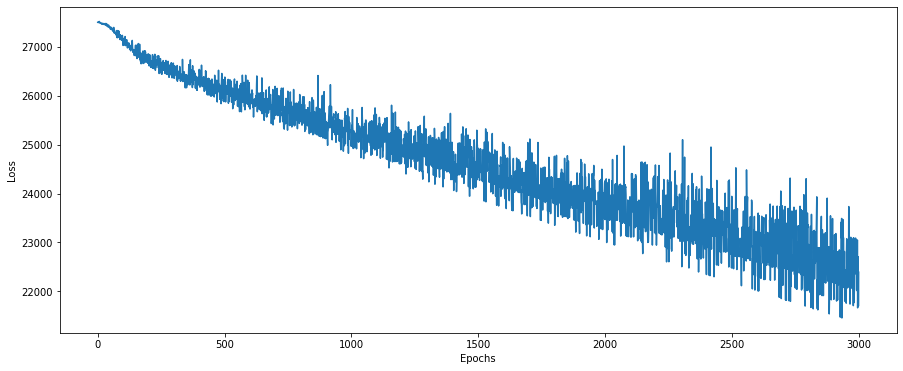

In [8]:
# plot the validation and training loss
plt.figure(figsize=(15,6))
plt.plot(history.history["loss"])
# plt.plot(history.history["val_loss"])
# plt.title("Train vs Validation Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
# plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [9]:
y_pred = np.zeros((y_data.shape[0],y_data.shape[1]))
X_data_model = np.zeros((X_data[0].shape[0],X_data[0].shape[1]))
for i in range(X_data[0].shape[0]):
    for j in range(X_data[0].shape[1]):
        X_data_model[i][j] = X_data[0][i][j]
for i in range(X_data.shape[0]):
    
#     print("Before\n")
#     print(X_test_model)
    X_data_model = X_data_model.reshape(1,n_steps_in,n_features)
#     print("Before\n")
#     print(X_test_model)
    pred = model.predict(X_data_model, verbose=0)
    X_data_model.reshape(n_steps_in,n_features)
#     print("Predicted\n")
#     print(pred)
#     print("Actual")
#     print(y_test[i])
    y_pred[i]=pred
#     print("y_pred all")
#     print(y_pred[i])
#     print("y_test all")
#     print(y_test[i])
    pred=pred.reshape(n_steps_out,n_features)
#     print(pred)

    X_data_model[0,:-n_steps_out] = X_data_model[0,n_steps_out:]
    X_data_model[0,-n_steps_out:] = pred
#     print("After")
#     print(X_test_model)

rmse = mean_squared_error(y_data, y_pred) ** (0.5)
print('Test RMSE: %.3f ' % rmse )

Test RMSE: 149.748 


In [10]:
    print(y_data)
    print(y_pred)
    y_data_re = y_data.reshape(n_steps_out*y_data.shape[0], n_features)
    y_pred_re = y_pred.reshape(n_steps_out*y_pred.shape[0], n_features)
    print("-----------------")
    print(y_data_re)
    print(y_pred_re)

[[ 16  10   3  32  12   0]
 [256  18   3 512  20   0]]
[[ 2.26578426e+01  9.77116871e+00  2.70768952e+00  2.53806381e+01
   1.17053623e+01 -1.90916285e-03]
 [ 3.70088310e+01  1.64965229e+01  3.07612348e+00  4.18473473e+01
   1.81655159e+01  1.61451101e-03]]
-----------------
[[ 16  10   3]
 [ 32  12   0]
 [256  18   3]
 [512  20   0]]
[[ 2.26578426e+01  9.77116871e+00  2.70768952e+00]
 [ 2.53806381e+01  1.17053623e+01 -1.90916285e-03]
 [ 3.70088310e+01  1.64965229e+01  3.07612348e+00]
 [ 4.18473473e+01  1.81655159e+01  1.61451101e-03]]


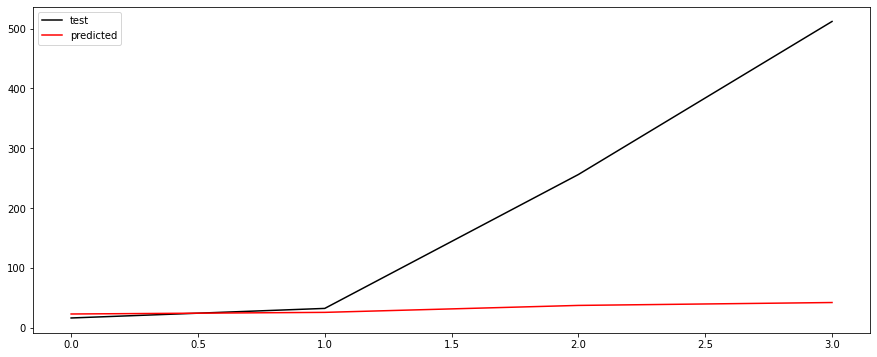

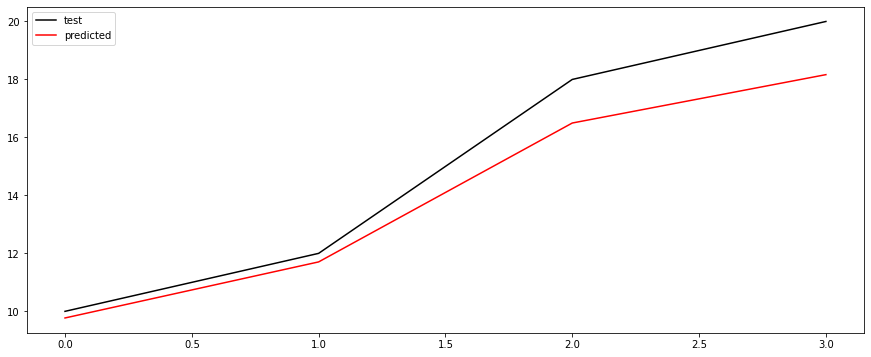

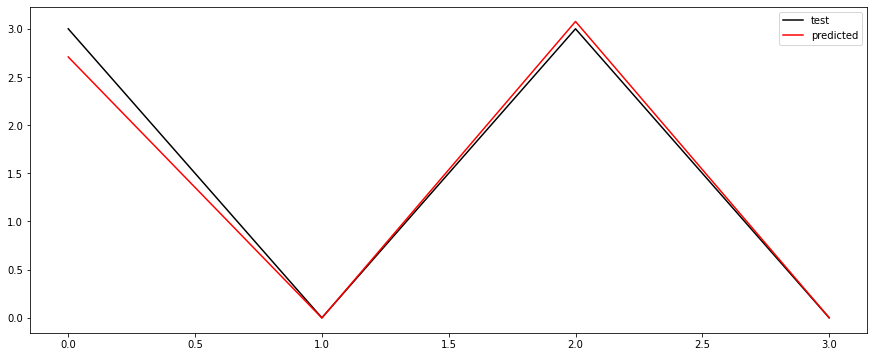

In [11]:
for i in range(n_features):

    plt.plot(y_data_re[:,i],color='black')
    plt.plot(y_pred_re[:,i],color='red')
    plt.legend(["test","predicted"])
    plt.show()
